In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
df_links=pd.read_csv('/content/drive/MyDrive/ml-latest-small/links.csv')
df_movies=pd.read_csv('/content/drive/MyDrive/ml-latest-small/movies.csv')
df_ratings=pd.read_csv('/content/drive/MyDrive/ml-latest-small/ratings.csv')

In [4]:
df=df_movies.merge(df_links,on='movieId')
df.drop('tmdbId',axis=1,inplace=True)
df_ratings.drop('timestamp',axis=1,inplace=True)


In [31]:
df_rating_ge_100=df_ratings.groupby('userId')['rating'].count()>25
df_rating_ge_100=df_rating_ge_100.reset_index().rename(columns={'rating': 'Count>25'})
df_movie_rating_userId=df_rating_ge_100[df_rating_ge_100['Count>25']==True]['userId'].reset_index().drop('index',axis=1)
df_movie_rating_userId=df_movie_rating_userId.merge(df_ratings,on='userId')
df_movie_rating_ge_100=df_movie_rating_userId.groupby('movieId')['rating'].count()>25
df_movie_rating_ge_100=df_movie_rating_ge_100.reset_index().rename(columns={'rating': 'Count>25'})
df_movie_rating_movieId=df_movie_rating_ge_100[df_movie_rating_ge_100['Count>25']==True]['movieId'].reset_index().drop('index',axis=1)
df_rate=df_movie_rating_userId.merge(df_movie_rating_movieId,on='movieId')
df_average_rate=df_rate.groupby('movieId')['rating'].mean().reset_index().rename(columns={'rating': 'AverageRate'})
df_rm = df.merge(df_movie_rating_movieId,on='movieId')
imdbID=df_rm['imdbId'].reset_index().drop('index',axis=1)

In [32]:
df_rm

,movieId,title,genres,imdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497
2,3,Grumpier Old Men (1995),Comedy|Romance,113228
3,5,Father of the Bride Part II (1995),Comedy,113041
4,6,Heat (1995),Action|Crime|Thriller,113277
...,...,...,...,...
992,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,2096673
993,139385,The Revenant (2015),Adventure|Drama,1663202
994,148626,"Big Short, The (2015)",Drama,1596363
995,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,2948356


In [6]:
!pip install cinemagoer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 4.7 MB/s eta 0:00:00


In [7]:
from imdb import Cinemagoer

# create an instance of the Cinemagoer class
ia = Cinemagoer()

In [37]:
def func2(id):
  print(id)
  try:
    movie = ia.get_movie(id)
  except:
    movie = ''

  # fetching plot attribute
  try:
    plot= movie['plot outline']
  except:
    try:
      plot= movie['plot']
    except:
      plot=''

  # fetching cast attribute
  cst=[]
  try:
    number_of_cast=len(movie['cast'])
    val= 5 if number_of_cast > 5 else number_of_cast
    for i in range(val):
      cst.append(movie['cast'][i].get("name"))
  except:
    cst.append('')

   # fetching crew attribute
  cr=[]
  try:
    number_of_crew=len(movie['miscellaneous crew'])
    val= 5 if number_of_crew > 5 else number_of_crew
    for i in range(val):
      cr.append(movie['miscellaneous crew'][i].get("name"))
  except:
    cr.append('')

  # fetching director attribute
  drct=[]
  try:
    dirctr=movie['director'][0].get("name") #str
    drct.append(dirctr) #list
  except:
    drct.append('')

  # fetching country attribute
  try:
    cntry=movie['countries']
  except:
    cntry=['']

  # fetching language attribute
  try:
    lnguge=movie['languages']
  except:
    lnguge=['']

  # fetching language attribute
  prod=[]
  try:
    length=len(movie['production companies'])
    for i in range(length):
      prod.append(movie['production companies'][i].get("name"))
  except:
    prod.append('')


  # return the values
  return id,plot,cst,cr,drct,cntry,lnguge,prod


In [34]:
df1=df_links['imdbId']


In [35]:
dff=df1.to_frame()[0:1]


In [38]:
result = df_rm['imdbId'].apply(lambda x: pd.Series(func2(x)))
result.columns = ['imdbId', 'plot','cast','crew','director','countries','languages','production_companies']

114709
113497
113228
113041
113277
114319
113189
112346
112641
114388
112281
113161
112722
114168
113627
112682
112792
114746
112431
112818
112697
113855
114681
114369
114148
114814
113819
110877
113419
113862
115683
116367
115759
116483
112573
75314
113326
116130
115685
112442
112384
114287
112462
112642
112715
112740
112851
112864
113071
113243
113481
113492
113749
113957
113986
114436
114508
114558
114781
114898
112508
109445
112883
109635
109686
109707
113117
110057
110099
110148
110216
76759
110367
103994
110322
110428
109836
110527
110638
110632
114069
110413
110912
110932
114214
111255
111282
111070
111161
114614
111280
114694
108550
114924
110598
109040
109045
109348
109444
109446
109506
109813
109830
109831
110213
110357
110475
110478
110622
110997
111257
111503
106220
109254
106519
109439
106582
106598
106673
106677
106697
106918
106965
106977
107144
110074
107206
107290
107362
116253
107616
107614
107818
107822
107977
108002
108052
108065
108160
83658
108174
107688
108333
10

2025-01-21 07:37:24,482 CRITICAL [imdbpy] /usr/local/lib/python3.11/dist-packages/imdb/_exceptions.py:32: IMDbDataAccessError exception raised; args: ({'errcode': None, 'errmsg': 'None', 'url': 'https://www.imdb.com/title/tt0118114/reference', 'proxy': '', 'exception type': 'IOError', 'original exception': <HTTPError 404: ''>},); kwds: {}
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/imdb/parser/http/__init__.py", line 233, in retrieve_unicode
    response = uopener.open(url)
               ^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/urllib/request.py", line 525, in open
    response = meth(req, response)
               ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/urllib/request.py", line 634, in http_response
    response = self.parent.error(
               ^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/urllib/request.py", line 563, in error
    return self._call_chain(*args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/urlli

118114
115963
117500
117998
113568
112691
57012
117765
117951
116629
116583
115798
116778
116213
117218
117333
117913
117438
117008
116191
116225
117918
68646
32904
45152
54698
52357
47396
53125
53604
53291
34583
33870
58385
47437
32138
31381
43014
33467
62622
38650
63350
43265
106611
109127
42332
102798
58331
33563
43274
59742
95016
117887
116908
117509
117802
117665
67992
70707
95159
79470
61418
92890
105236
91763
103772
101761
104036
83866
92099
117318
96754
82340
71853
108598
95765
99703
116209
73486
80684
93779
82971
88846
90605
60196
50083
56172
66921
56592
78788
86190
99685
78748
106308
54215
80455
71562
93058
104361
86879
81398
75686
82096
70735
67185
88247
97441
79522
97165
61722
100263
50212
71315
88794
81505
92005
92991
57115
77416
107048
105695
56218
36613
88763
101921
66206
94625
91203
61512
72431
32455
97493
52618
88258
97576
83987
87553
97351
64115
98635
103644
56869
103874
74285
117731
117666
115433
99423
79945
102975
98382
84726
88170
92007
103776
77631
73195
116996
11

In [40]:
result

,imdbId,plot,cast,crew,director,countries,languages,production_companies
0,114709,A little boy named Andy loves to be in his roo...,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[April, Ronen Barzel, Susan Bradley, Andrew Ca...",[John Lasseter],[United States],[English],"[Walt Disney Pictures, Pixar Animation Studios]"
1,113497,"Jumanji, one of the most unique--and dangerous...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Mary Arnold, Carra Braveman, Adam Bryant, Mik...",[Joe Johnston],[United States],"[English, French]","[TriStar Pictures, Interscope Communications, ..."
2,113228,Things don't seem to change much in Wabasha Co...,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[David Bifano, Brooke Brooks, Jill Carvalho, S...",[Howard Deutch],[United States],"[English, Italian, German]","[Lancaster Gate, Warner Bros.]"
3,113041,"In this sequel to ""Father of the Bride"", Georg...","[Steve Martin, Diane Keaton, Martin Short, Kim...","[Dave Ange, Roshanna Baron, Ronald Castro, Alm...",[Charles Shyer],[United States],[English],"[Touchstone Pictures, Sandollar Productions, T..."
4,113277,Hunters and their prey--Neil and his professio...,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[Chuck Adamson, Edward Allen, Wendy Altman-Coh...",[Michael Mann],[United States],"[English, Spanish]","[Warner Bros., New Regency Productions, Forwar..."
...,...,...,...,...,...,...,...,...
992,2096673,"Growing up can be a bumpy road, and it's no ex...","[Amy Poehler, Phyllis Smith, Richard Kind, Bil...","[Abril, Mark Adams, Adeline, Ajay, Megan Albert]",[Pete Docter],[United States],"[English, Portuguese, Latvian]","[Pixar Animation Studios, Walt Disney Pictures]"
993,1663202,"While exploring uncharted wilderness in 1823, ...","[Leonardo DiCaprio, Tom Hardy, Domhnall Gleeso...","[Dustin Lee Abram, Mike Aichholz, Eugenia Alad...",[Alejandro G. Iñárritu],"[United States, Hong Kong, Taiwan, Argentina]","[English, Pawnee, French]","[New Regency Productions, RatPac Entertainment..."
994,1596363,Three separate but parallel stories of the U.S...,"[Ryan Gosling, Rudy Eisenzopf, Casey Groves, C...","[Alex Aaron, Kd Amond, Rachel Andrew, Colleen ...",[Adam McKay],[United States],[English],"[Paramount Pictures, New Regency Productions, ..."
995,2948356,From the largest elephant to the smallest shre...,"[Ginnifer Goodwin, Jason Bateman, Idris Elba, ...","[Diego Abatantuono, David A. Aguilar, Eileen A...",[Byron Howard],[United States],[English],"[Walt Disney Pictures, Walt Disney Animation S..."


In [41]:
df_rec=df_rm.merge(result,on='imdbId')


In [42]:
df_rec

,movieId,title,genres,imdbId,plot,cast,crew,director,countries,languages,production_companies
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,A little boy named Andy loves to be in his roo...,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","[April, Ronen Barzel, Susan Bradley, Andrew Ca...",[John Lasseter],[United States],[English],"[Walt Disney Pictures, Pixar Animation Studios]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,"Jumanji, one of the most unique--and dangerous...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...","[Mary Arnold, Carra Braveman, Adam Bryant, Mik...",[Joe Johnston],[United States],"[English, French]","[TriStar Pictures, Interscope Communications, ..."
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,Things don't seem to change much in Wabasha Co...,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...","[David Bifano, Brooke Brooks, Jill Carvalho, S...",[Howard Deutch],[United States],"[English, Italian, German]","[Lancaster Gate, Warner Bros.]"
3,5,Father of the Bride Part II (1995),Comedy,113041,"In this sequel to ""Father of the Bride"", Georg...","[Steve Martin, Diane Keaton, Martin Short, Kim...","[Dave Ange, Roshanna Baron, Ronald Castro, Alm...",[Charles Shyer],[United States],[English],"[Touchstone Pictures, Sandollar Productions, T..."
4,6,Heat (1995),Action|Crime|Thriller,113277,Hunters and their prey--Neil and his professio...,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...","[Chuck Adamson, Edward Allen, Wendy Altman-Coh...",[Michael Mann],[United States],"[English, Spanish]","[Warner Bros., New Regency Productions, Forwar..."
...,...,...,...,...,...,...,...,...,...,...,...
992,134853,Inside Out (2015),Adventure|Animation|Children|Comedy|Drama|Fantasy,2096673,"Growing up can be a bumpy road, and it's no ex...","[Amy Poehler, Phyllis Smith, Richard Kind, Bil...","[Abril, Mark Adams, Adeline, Ajay, Megan Albert]",[Pete Docter],[United States],"[English, Portuguese, Latvian]","[Pixar Animation Studios, Walt Disney Pictures]"
993,139385,The Revenant (2015),Adventure|Drama,1663202,"While exploring uncharted wilderness in 1823, ...","[Leonardo DiCaprio, Tom Hardy, Domhnall Gleeso...","[Dustin Lee Abram, Mike Aichholz, Eugenia Alad...",[Alejandro G. Iñárritu],"[United States, Hong Kong, Taiwan, Argentina]","[English, Pawnee, French]","[New Regency Productions, RatPac Entertainment..."
994,148626,"Big Short, The (2015)",Drama,1596363,Three separate but parallel stories of the U.S...,"[Ryan Gosling, Rudy Eisenzopf, Casey Groves, C...","[Alex Aaron, Kd Amond, Rachel Andrew, Colleen ...",[Adam McKay],[United States],[English],"[Paramount Pictures, New Regency Productions, ..."
995,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy,2948356,From the largest elephant to the smallest shre...,"[Ginnifer Goodwin, Jason Bateman, Idris Elba, ...","[Diego Abatantuono, David A. Aguilar, Eileen A...",[Byron Howard],[United States],[English],"[Walt Disney Pictures, Walt Disney Animation S..."


In [43]:
def convert_list(val):
    return val.split("|")
# Transforming genres
df_rec['genres']=df_rec['genres'].apply(convert_list)

In [44]:
df_rec['cast'].replace("'","").replace(" ","").replace("-","")

,cast
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,"[Steve Martin, Diane Keaton, Martin Short, Kim..."
4,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo..."
...,...
992,"[Amy Poehler, Phyllis Smith, Richard Kind, Bil..."
993,"[Leonardo DiCaprio, Tom Hardy, Domhnall Gleeso..."
994,"[Ryan Gosling, Rudy Eisenzopf, Casey Groves, C..."
995,"[Ginnifer Goodwin, Jason Bateman, Idris Elba, ..."


In [46]:
df_rec['cast']

,cast
0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,"[Steve Martin, Diane Keaton, Martin Short, Kim..."
4,"[Al Pacino, Robert De Niro, Val Kilmer, Jon Vo..."
...,...
992,"[Amy Poehler, Phyllis Smith, Richard Kind, Bil..."
993,"[Leonardo DiCaprio, Tom Hardy, Domhnall Gleeso..."
994,"[Ryan Gosling, Rudy Eisenzopf, Casey Groves, C..."
995,"[Ginnifer Goodwin, Jason Bateman, Idris Elba, ..."


In [48]:
def convert_string_to_list(value):
    """
    Convert a value to list, handling cases where the input might be:
    - Already a list
    - String representation of a list
    - None/null value

    Args:
        value: Input value that needs to be converted to a list

    Returns:
        list: Cleaned list of strings
    """
    # If value is already a list, return it
    if isinstance(value, list):
        return value

    # If value is None/null, return empty list
    if pd.isna(value):
        return []

    # Convert to string and clean
    text = str(value)
    chars_to_remove = ["'", " ", "-", "[", "]"]
    for char in chars_to_remove:
        text = text.replace(char, "")

    return text.split(",") if text else []

# List of columns to transform
list_columns = ['cast', 'crew', 'director', 'countries',
                'languages', 'production_companies']

# Apply transformation to all specified columns
for column in list_columns:
    df_rec[column] = df_rec[column].apply(convert_string_to_list)

In [49]:
'''df_rec['plot']=df_rec['plot'].apply(lambda x:x.split() if isinstance(x, str) else x)
# Transforming title
df_rec['title']=df_rec['title'].str.replace(r'\(\d{4}\)', '').str.strip()
# Making seperate column for building the recommendation system
def convert_title(val):
    return  val.split(" ")
df_rec['title_tag']=df_rec['title'].apply(convert_title)'''

In [91]:
# Clean and split plot text into words
def clean_and_split_text(text):
    """
    Clean text and split into words, handling non-string inputs
    """
    if not isinstance(text, str):
        return []
    cleaned = text.lower().replace('\n', ' ')
    return [word for word in cleaned.split() if word]

df_rec['plot'] = df_rec['plot'].apply(clean_and_split_text)

# Clean title by removing year and extra whitespace
df_rec['title'] = df_rec['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

# Create title tags for recommendation system
def create_title_tags(title):
    """
    Convert title to list of cleaned words for recommendation system
    """
    if not isinstance(title, str):
        return []
    return [word.lower() for word in title.split() if word]

df_rec['title_tag'] = df_rec['title'].apply(create_title_tags)

In [104]:
df_rec['tags']=df_rec['title_tag']+df_rec['genres']+df_rec['plot']+df_rec['cast']+df_rec['crew']+df_rec['director']+df_rec['countries']+df_rec['languages']+df_rec['production_companies']
# Droping the columns
new_df =df_rec.drop(columns=['plot','genres','director','cast','crew','countries','languages','production_companies','title_tag'])
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
# Merging the average rate with the dataset
new_df=new_df.merge(df_average_rate,on='movieId')

In [113]:
# This function makes the imdbId to the api_imdbId( ths will be used to fetch the recommended movies from the API)
def get_imdbId(movie_Ids):
    v=str(movie_Ids)
    if len(v) == 6:
        vd='tt0'
        v=vd+v
    if len(v) == 7:
        gt='tt'
        v=gt+v
    if len(v)==5:
        jt='tt00'
        v=jt+v
    return v

new_df['api_imdbId']=new_df['imdbId'].apply(get_imdbId)
# Dropping the null values from the dataset
new_df.dropna(inplace=True)

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=7000,stop_words='english')
vector = cv.fit_transform(new_df['tags']).toarray()

In [98]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)

In [99]:
# combining similarity with rating
for i in range(similarity.shape[0]):
    similarity[i]= similarity[i]*0.9 + new_df['AverageRate']*0.2*0.1
    similarity[i][i]=1.0000000

In [100]:
similarity_sort=[]
for j in range(len(similarity)):
    similarity_sort.append(sorted(enumerate(similarity[j]),reverse=True,key=lambda x: x[1]))

similar=[]
for k in range(len(similarity_sort)):
    similar.append(similarity_sort[k][0:20])

In [101]:
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import BytesIO
%matplotlib inline

In [111]:
def fetch_poster(imdb_id):
    api_key = 'f63a16f0'
    url = f'http://www.omdbapi.com/?i={imdb_id}&apikey={api_key}'
    response = requests.get(url)
    data = response.json()
    print(data)
    poster_url = data['Poster']
    poster_response = requests.get(poster_url)
    image = Image.open(BytesIO(poster_response.content))
    return display(image)

In [115]:
new_df

,movieId,title,imdbId,tags,AverageRate,api_imdbId
0,1,Toy Story,114709,toy story Adventure Animation Children Comedy ...,3.923077,tt0114709
1,2,Jumanji,113497,jumanji Adventure Children Fantasy Robin Willi...,3.435780,tt0113497
2,3,Grumpier Old Men,113228,grumpier old men Comedy Romance Walter Matthau...,3.280000,tt0113228
3,5,Father of the Bride Part II,113041,father of the bride part ii Comedy Steve Marti...,3.021277,tt0113041
4,6,Heat,113277,heat Action Crime Thriller Al Pacino Robert De...,3.946078,tt0113277
...,...,...,...,...,...,...
992,134853,Inside Out,2096673,inside out Adventure Animation Children Comedy...,3.813953,tt2096673
993,139385,The Revenant,1663202,the revenant Adventure Drama Leonardo DiCaprio...,3.883333,tt1663202
994,148626,"Big Short, The",1596363,"big short, the Drama Ryan Gosling Rudy Eisenzo...",3.961538,tt1596363
995,152081,Zootopia,2948356,zootopia Action Adventure Animation Children C...,3.890625,tt2948356


In [121]:
def recommend(movie):
    ind=new_df[new_df['title']==movie].index[0]
    v=similar[ind]
    for i in range(10):
        ind=v[i][0]
        imdb_id=new_df['api_imdbId'][ind]
        print(fetch_poster(imdb_id))
        print(new_df['title'][ind])

{'Title': 'Toy Story', 'Year': '1995', 'Rated': 'G', 'Released': '22 Nov 1995', 'Runtime': '81 min', 'Genre': 'Animation, Adventure, Comedy', 'Director': 'John Lasseter', 'Writer': 'John Lasseter, Pete Docter, Andrew Stanton', 'Actors': 'Tom Hanks, Tim Allen, Don Rickles', 'Plot': "A cowboy doll is profoundly threatened and jealous when a new spaceman action figure supplants him as top toy in a boy's bedroom.", 'Language': 'English', 'Country': 'United States', 'Awards': 'Nominated for 3 Oscars. 29 wins & 24 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BZTA3OWVjOWItNjE1NS00NzZiLWE1MjgtZDZhMWI1ZTlkNzYwXkEyXkFqcGc@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.3/10'}, {'Source': 'Rotten Tomatoes', 'Value': '100%'}, {'Source': 'Metacritic', 'Value': '96/100'}], 'Metascore': '96', 'imdbRating': '8.3', 'imdbVotes': '1,102,860', 'imdbID': 'tt0114709', 'Type': 'movie', 'DVD': 'N/A', 'BoxOffice': '$223,225,679', 'Production': 'N/A', 'Web

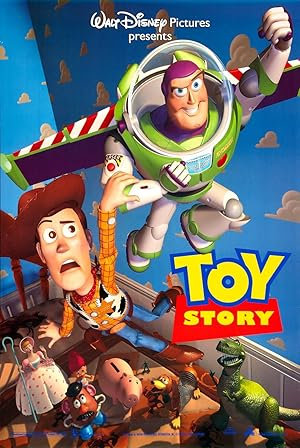

None
Toy Story
{'Title': 'Toy Story 2', 'Year': '1999', 'Rated': 'G', 'Released': '24 Nov 1999', 'Runtime': '92 min', 'Genre': 'Animation, Adventure, Comedy', 'Director': 'John Lasseter, Ash Brannon, Lee Unkrich', 'Writer': 'John Lasseter, Pete Docter, Ash Brannon', 'Actors': 'Tom Hanks, Tim Allen, Joan Cusack', 'Plot': 'When Woody is stolen by a toy collector, Buzz and his friends set out on a rescue mission to save Woody before he becomes a museum toy property with his roundup gang Jessie, Prospector, and Bullseye.', 'Language': 'English', 'Country': 'United States', 'Awards': 'Nominated for 1 Oscar. 21 wins & 27 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BNzVmODlhMDEtY2YxZi00OTVjLTlkNTktN2Q2OTRlM2I4M2FhXkEyXkFqcGc@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '100%'}, {'Source': 'Metacritic', 'Value': '88/100'}], 'Metascore': '88', 'imdbRating': '7.9', 'imdbVotes': '635,436', '

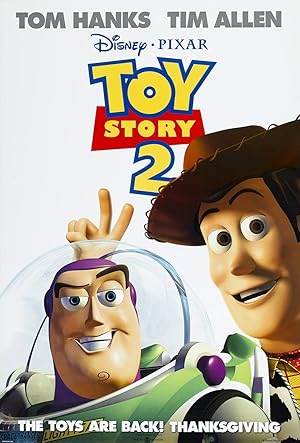

None
Toy Story 2
{'Title': 'Toy Story 3', 'Year': '2010', 'Rated': 'G', 'Released': '18 Jun 2010', 'Runtime': '103 min', 'Genre': 'Animation, Adventure, Comedy', 'Director': 'Lee Unkrich', 'Writer': 'John Lasseter, Andrew Stanton, Lee Unkrich', 'Actors': 'Tom Hanks, Tim Allen, Joan Cusack', 'Plot': "The toys are mistakenly delivered to a day-care center instead of the attic right before Andy leaves for college, and it's up to Woody to convince the other toys that they weren't abandoned and to return home.", 'Language': 'English, Spanish', 'Country': 'United States', 'Awards': 'Won 2 Oscars. 63 wins & 96 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTgxOTY4Mjc0MF5BMl5BanBnXkFtZTcwNTA4MDQyMw@@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.3/10'}, {'Source': 'Rotten Tomatoes', 'Value': '98%'}, {'Source': 'Metacritic', 'Value': '92/100'}], 'Metascore': '92', 'imdbRating': '8.3', 'imdbVotes': '916,703', 'imdbID': 'tt0435761', 'Type':

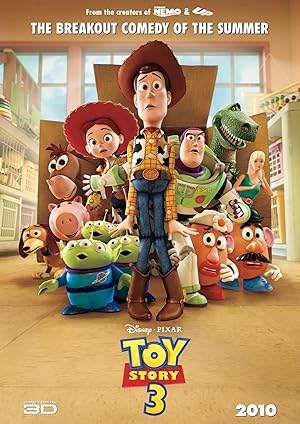

None
Toy Story 3
{'Title': "The Emperor's New Groove", 'Year': '2000', 'Rated': 'G', 'Released': '15 Dec 2000', 'Runtime': '78 min', 'Genre': 'Animation, Adventure, Comedy', 'Director': 'Mark Dindal', 'Writer': 'Chris Williams, Mark Dindal, David Reynolds', 'Actors': 'David Spade, John Goodman, Eartha Kitt', 'Plot': 'Emperor Kuzco is turned into a llama by his ex-administrator Yzma, and must now regain his throne with the help of Pacha, the gentle llama herder.', 'Language': 'English', 'Country': 'United States, Japan, France', 'Awards': 'Nominated for 1 Oscar. 7 wins & 27 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMjM2MWU5ZDEtNDZlZC00ZmQ2LThiOTEtMmZkMzAxMmI5MGIyXkEyXkFqcGc@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.4/10'}, {'Source': 'Rotten Tomatoes', 'Value': '85%'}, {'Source': 'Metacritic', 'Value': '70/100'}], 'Metascore': '70', 'imdbRating': '7.4', 'imdbVotes': '233,042', 'imdbID': 'tt0120917', 'Type': 'movie', 'DVD'

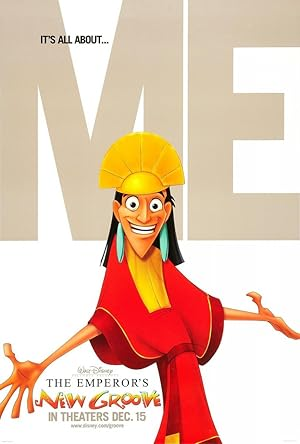

None
Emperor's New Groove, The
{'Title': 'Monsters, Inc.', 'Year': '2001', 'Rated': 'G', 'Released': '23 Nov 2001', 'Runtime': '92 min', 'Genre': 'Animation, Adventure, Comedy', 'Director': 'Pete Docter, David Silverman, Lee Unkrich', 'Writer': 'Pete Docter, Jill Culton, Jeff Pidgeon', 'Actors': 'Billy Crystal, John Goodman, Mary Gibbs', 'Plot': 'In order to power the city, monsters have to scare children so that they scream. However, the children are toxic to the monsters, and after a child gets through, two monsters realize things may not be what they think.', 'Language': 'English', 'Country': 'United States', 'Awards': 'Won 1 Oscar. 15 wins & 38 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTY1NTI0ODUyOF5BMl5BanBnXkFtZTgwNTEyNjQ0MDE@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.1/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '79/100'}], 'Metascore': '79', 'imdbRating': '8.1', 'imdbVot

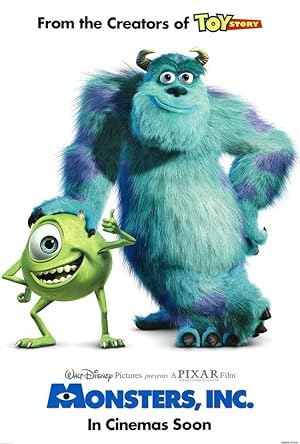

None
Monsters, Inc.
{'Title': "A Bug's Life", 'Year': '1998', 'Rated': 'G', 'Released': '25 Nov 1998', 'Runtime': '95 min', 'Genre': 'Animation, Adventure, Comedy', 'Director': 'John Lasseter, Andrew Stanton', 'Writer': 'John Lasseter, Andrew Stanton, Joe Ranft', 'Actors': 'Kevin Spacey, Dave Foley, Julia Louis-Dreyfus', 'Plot': 'A misfit ant, looking for "warriors" to save his colony from greedy grasshoppers, recruits a group of bugs that turn out to be an inept circus troupe.', 'Language': 'English', 'Country': 'United States', 'Awards': 'Nominated for 1 Oscar. 14 wins & 21 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BNGI3Mjc1ZjUtYTJhYS00NjBiLTgyYjctODU5NTNlMWJiYjYzXkEyXkFqcGc@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.2/10'}, {'Source': 'Rotten Tomatoes', 'Value': '92%'}, {'Source': 'Metacritic', 'Value': '78/100'}], 'Metascore': '78', 'imdbRating': '7.2', 'imdbVotes': '322,011', 'imdbID': 'tt0120623', 'Type': 'movie', 'D

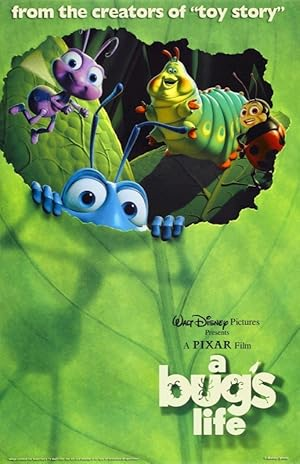

None
Bug's Life, A
{'Title': 'Aladdin', 'Year': '1992', 'Rated': 'G', 'Released': '25 Nov 1992', 'Runtime': '90 min', 'Genre': 'Animation, Adventure, Comedy', 'Director': 'Ron Clements, John Musker', 'Writer': 'Ron Clements, John Musker, Ted Elliott', 'Actors': 'Scott Weinger, Robin Williams, Linda Larkin', 'Plot': 'A kind-hearted street urchin and a power-hungry Grand Vizier vie for a magic lamp that has the power to make their deepest wishes come true.', 'Language': 'English', 'Country': 'United States', 'Awards': 'Won 2 Oscars. 35 wins & 22 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMmQwYWZjZGItYzc0OC00ZDllLTg3NjItOWIyOWYwMDljMjAyXkEyXkFqcGc@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.0/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '86/100'}], 'Metascore': '86', 'imdbRating': '8.0', 'imdbVotes': '481,477', 'imdbID': 'tt0103639', 'Type': 'movie', 'DVD': 'N/A', 'BoxOffice': '$217,35

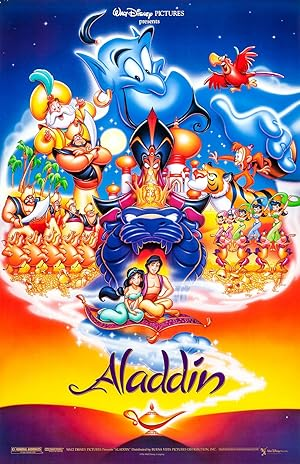

None
Aladdin
{'Title': 'Finding Nemo', 'Year': '2003', 'Rated': 'G', 'Released': '30 May 2003', 'Runtime': '100 min', 'Genre': 'Animation, Adventure, Comedy', 'Director': 'Andrew Stanton, Lee Unkrich', 'Writer': 'Andrew Stanton, Bob Peterson, David Reynolds', 'Actors': 'Albert Brooks, Ellen DeGeneres, Alexander Gould', 'Plot': 'After his son is captured in the Great Barrier Reef and taken to Sydney, a timid clownfish sets out on a journey to bring him home.', 'Language': 'English, Japanese, Russian', 'Country': 'United States, Japan', 'Awards': 'Won 1 Oscar. 49 wins & 63 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTc5NjExNTA5OV5BMl5BanBnXkFtZTYwMTQ0ODY2._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.2/10'}, {'Source': 'Rotten Tomatoes', 'Value': '99%'}, {'Source': 'Metacritic', 'Value': '90/100'}], 'Metascore': '90', 'imdbRating': '8.2', 'imdbVotes': '1,142,262', 'imdbID': 'tt0266543', 'Type': 'movie', 'DVD': 'N/A', 'BoxOffice'

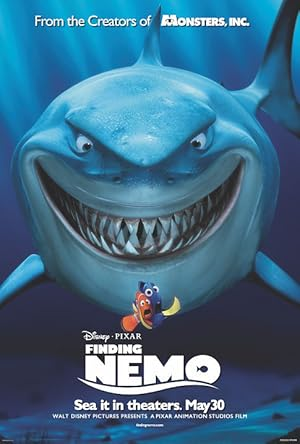

None
Finding Nemo
{'Title': 'The Lion King', 'Year': '1994', 'Rated': 'G', 'Released': '24 Jun 1994', 'Runtime': '88 min', 'Genre': 'Animation, Adventure, Drama', 'Director': 'Roger Allers, Rob Minkoff', 'Writer': 'Irene Mecchi, Jonathan Roberts, Linda Woolverton', 'Actors': 'Matthew Broderick, Jeremy Irons, James Earl Jones', 'Plot': 'Lion prince Simba and his father are targeted by his bitter uncle, who wants to ascend the throne himself.', 'Language': 'English, Swahili, Xhosa, Zulu', 'Country': 'United States', 'Awards': 'Won 2 Oscars. 43 wins & 35 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BZGRiZDZhZjItM2M3ZC00Y2IyLTk3Y2MtMWY5YjliNDFkZTJlXkEyXkFqcGc@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.5/10'}, {'Source': 'Rotten Tomatoes', 'Value': '93%'}, {'Source': 'Metacritic', 'Value': '88/100'}], 'Metascore': '88', 'imdbRating': '8.5', 'imdbVotes': '1,181,907', 'imdbID': 'tt0110357', 'Type': 'movie', 'DVD': 'N/A', 'BoxOffice'

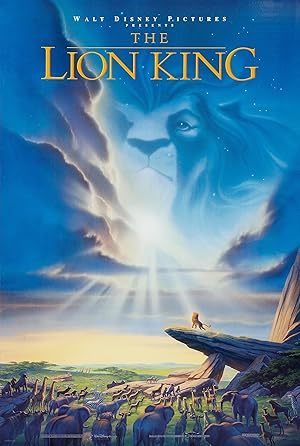

None
Lion King, The
{'Title': 'Frozen', 'Year': '2013', 'Rated': 'PG', 'Released': '27 Nov 2013', 'Runtime': '102 min', 'Genre': 'Animation, Adventure, Comedy', 'Director': 'Chris Buck, Jennifer Lee', 'Writer': 'Jennifer Lee, Hans Christian Andersen, Chris Buck', 'Actors': 'Kristen Bell, Idina Menzel, Jonathan Groff', 'Plot': "Fearless optimist Anna teams up with rugged mountain man Kristoff and his loyal reindeer Sven in an epic journey to find Anna's sister Elsa, whose icy powers have trapped the kingdom of Arendelle in eternal winter.", 'Language': 'English', 'Country': 'United States', 'Awards': 'Won 2 Oscars. 83 wins & 60 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTQ1MjQwMTE5OF5BMl5BanBnXkFtZTgwNjk3MTcyMDE@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.4/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}], 'Metascore': '75', 'imdbRating': '7.4', 'imdbVotes': '678,255', 'imdbI

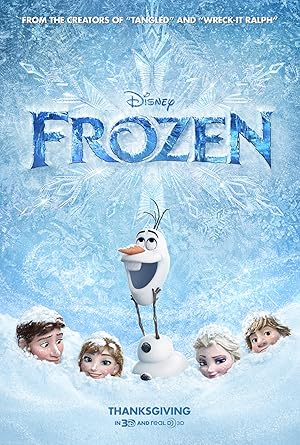

None
Frozen


In [122]:
recommend('Toy Story')

In [141]:
!pip install flask-ngrok
!ngrok authtoken '2rvoiKrWpR8cRh70fouXybi42oF_7Xf4rhs6AZ9C5iTQ7XoLD'
!pip install --upgrade pyngrok

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [144]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
!./ngrok authtoken YOUR_AUTH_TOKEN

--2025-01-21 08:56:29--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.71.179.82, 99.83.220.108, 75.2.60.68, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.71.179.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  22.0MB/s    in 0.6s    

2025-01-21 08:56:30 (22.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from google.colab.output import eval_js
from flask import Flask, render_template, request, jsonify, redirect, url_for
import pandas as pd  # Add if not already imported

# Print the public URL
print(eval_js("google.colab.kernel.proxyPort(5000)"))

app = Flask(__name__)

# Add error handling
@app.errorhandler(404)
def page_not_found(e):
    return render_template('/content/drive/MyDrive/ml-latest-small/404.html'), 404

@app.errorhandler(500)
def internal_server_error(e):
    return render_template('/content/drive/MyDrive/ml-latest-small/500.html'), 500

@app.route('/', methods=['GET', 'POST'])
def index():
    return render_template('/content/drive/MyDrive/ml-latest-small/index.html')

@app.route('/about', methods=['GET', 'POST'])
def about():
    return render_template('/content/drive/MyDrive/ml-latest-small/about.html')

@app.route('/recommend', methods=['GET', 'POST'])
def recommend_page():
    try:
        movie_df = new_df  # Make sure new_df is defined
        movie_titles = movie_df['title'].values.tolist()
        return render_template('/content/drive/MyDrive/ml-latest-small/recommend.html', movie_title=movie_titles)
    except Exception as e:
        print(f"Error in recommend route: {str(e)}")
        return redirect(url_for('index'))

@app.route('/recommended_movies', methods=['GET', 'POST'])
def product():
    if request.method == "POST":
        try:
            movies = request.form.get('movies', 'Select movie here')
            if movies == 'Select movie here':
                return redirect(url_for('index'))

            poster, recommended_movies = recommend(movies)  # Make sure recommend() is defined
            return render_template(
                'predict.html',
                movies=movies,
                recommended_movies=recommended_movies,
                poster=poster
            )
        except Exception as e:
            print(f"Error in recommendation: {str(e)}")
            return redirect(url_for('index'))
    return render_template('/content/drive/MyDrive/ml-latest-small/predict.html')

@app.route('/contact', methods=['GET', 'POST'])
def contact():
    return render_template('contact.html')

if __name__ == "__main__":
    try:
        app.run(port=5000, debug=True)  # Added debug=True for development
    except Exception as e:
        print(f"Error starting Flask app: {str(e)}")

https://o4tzvqtxic-496ff2e9c6d22116-5000-colab.googleusercontent.com/
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
